In [1]:
# what we are studying
model = "LR"
dataset = "census"
sensitive_param = "sex"
import os
os.chdir('./jupyter_analysis')

FileNotFoundError: [Errno 2] No such file or directory: './jupyter_analysis'

In [2]:
import pandas as pd
df = pd.read_csv("../Dataset" + "/" + f"{model}_{dataset}_{sensitive_param}_exhaust.csv")
print(f"Min score: {df['score'].min()}")
print(f"Max score: {df['score'].max()}")
print(f"Min AOD: {df['AOD'].min()}")
print(f"Max AOD: {df['AOD'].max()}")

Min score: 0.6298980469229825
Max score: 0.8161159562707284
Min AOD: 0.0
Max AOD: 0.3956390289786591


In [3]:
print(f"Best AOD: {df[df['AOD'] == df['AOD'].min()].iloc[0].mask}")
print(f"Best accuracy: {df[df['score'] == df['score'].min()].iloc[0].mask}")

Best AOD: <bound method Series.mask of solver                                                       liblinear
penalty                                                             l2
dual                                                              True
tol                                                           0.625992
C                                                            68.653623
fit_intercept                                                    False
intercept_scaling                                             3.890568
max_iteration                                                     1015
multi_class                                                       auto
l1_ratio                                                           NaN
class_weight                                                       NaN
random_state                                                      2019
verbose                                                              0
warm_start                            

## Recreating the best model

In [4]:
import ast
import sys
sys.path.append("../subjects/")

import numpy as np
import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from adf_data.census import census_data
from adf_data.credit import credit_data
from adf_data.bank import bank_data
from adf_data.compas import compas_data
import matplotlib.pyplot as plt
os.chdir('../')

['/home/normenyu/Parfait-ML/jupyter_analysis', '/home/normenyu/anaconda3/lib/python39.zip', '/home/normenyu/anaconda3/lib/python3.9', '/home/normenyu/anaconda3/lib/python3.9/lib-dynload', '', '/home/normenyu/anaconda3/lib/python3.9/site-packages', '/home/normenyu/anaconda3/lib/python3.9/site-packages/locket-0.2.1-py3.9.egg', '/home/normenyu/anaconda3/lib/python3.9/site-packages/IPython/extensions', '/home/normenyu/.ipython', '../subjects/', '../', '../']


Unfortunately, we HAVE to standardize the data in order to make an "apples-to-apples" comparison.

In [5]:
data = {"census":census_data, "credit":credit_data, "bank":bank_data, "compas": compas_data}
X, Y, input_shape, nb_classes = data[dataset]()
Y = np.argmax(Y, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)
std = StandardScaler()
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

### The most fair model has the following coeficients

[2, 1, 1, 0.6259921500137948, 68.65362285004268, 0, 3.8905675202032266, 1015, 2, 1, 2, 3, 0, 1, 0]
['liblinear', 'l2', True, 0.6259921500137948, 68.65362285004268, False, 3.8905675202032266, 1015, 'auto', 'rand', 'weighted', 'int', 0, True, 'None']
['liblinear', 'l2', True, 0.6259921500137948, 68.65362285004268, False, 3.8905675202032266, 1015, 'auto', None, None, 2019, 0, True, None]
[[-7.00464892e-04 -8.10495167e-04 -5.65956232e-01 -7.07601511e-02
  -1.10310116e-01 -6.42971680e-02  1.05266232e-01  2.82949159e-01
   5.43056872e-04]]
[1015]
0.6747328338042009
[True, True, False, False, False, False, False, False, False, True, True, False, False]


/home/normenyu/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


<BarContainer object of 9 artists>

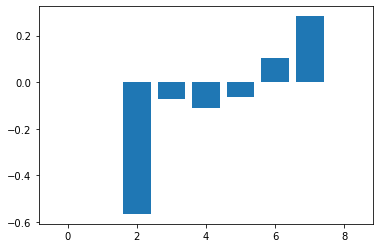

In [6]:
inp = ast.literal_eval(df[df['AOD'] == df['AOD'].min()].iloc[0]["inp"])
feature_mask = ast.literal_eval(df[df['AOD'] == df['AOD'].min()].iloc[0]["mask"])
X_train_masked = np.delete(X_train, feature_mask, axis = 1)
X_test_masked = np.delete(X_test, feature_mask, axis = 1)
model = LogisticRegression.logistic_regression(inp, X_train_masked, X_test_masked, y_train, y_test, sensitive_param, dataset_name=dataset, save_model=True)[1]
print(model.coef_)
print(model.n_iter_)
print(model.score(X_test_masked, y_test))
print(feature_mask)
plt.bar(range(len(model.coef_[0])),model.coef_[0])

### The most accurate model has the following coeficients

[2, 1, 1, 0.6259921500137948, 68.65362285004268, 0, 3.8905675202032266, 1015, 2, 1, 2, 3, 0, 1, 0]
['liblinear', 'l2', True, 0.6259921500137948, 68.65362285004268, False, 3.8905675202032266, 1015, 'auto', 'rand', 'weighted', 'int', 0, True, 'None']
['liblinear', 'l2', True, 0.6259921500137948, 68.65362285004268, False, 3.8905675202032266, 1015, 'auto', None, None, 2019, 0, True, None]
[[-0.0295242  -0.96424136 -0.14839846 -0.11599805  8.48252962  0.29806215]]
[1015]
0.7949883306719077
[True, True, True, False, False, False, True, False, True, False, False, True, True]


/home/normenyu/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


<BarContainer object of 6 artists>

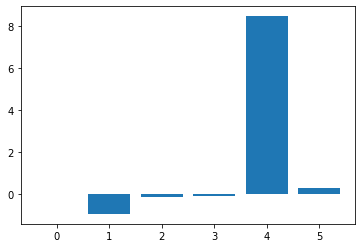

In [9]:
inp = ast.literal_eval(df[df['score'] == df['score'].max()].iloc[0]["inp"])
feature_mask = ast.literal_eval(df[df['score'] == df['score'].max()].iloc[0]["mask"])
X_train_masked = np.delete(X_train, feature_mask, axis = 1)
X_test_masked = np.delete(X_test, feature_mask, axis = 1)
model = LogisticRegression.logistic_regression(inp, X_train_masked, X_test_masked, y_train, y_test, sensitive_param, dataset_name=dataset, save_model=True)[1]
print(model.coef_)
print(model.n_iter_)
print(model.score(X_test_masked, y_test))
print(feature_mask)
plt.bar(range(len(model.coef_[0])),model.coef_[0])

In [8]:
df[df['score'] == df['score'].max()]["score"]

6471    0.816116
Name: score, dtype: float64